In [1]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
import warnings
import os
import sys

In [2]:
# Load the data
rolls = np.load('rolls.npy')
# Split data into train and validation sets
split_point = len(rolls) // 2
train_data = rolls[:split_point].reshape(-1, 1)
valid_data = rolls[split_point:].reshape(-1, 1)

# Set constant probabilities for the fair die
fair_die_probs = np.array([0.1,0.1,0.3,0.1,0.1,0.3])

# Number of iterations to search for the best emission probabilities
num_iterations = 20

best_model = None
best_score = float('-inf')

In [3]:
np.random.seed(13)
for iteration in range(num_iterations):
    unfair_die_probs = np.random.rand(6)+1e-8
    unfair_die_probs /= unfair_die_probs.sum()
    model = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=100, init_params="mc")
    model.startprob_ = np.array([1.0,0.0])
    model.transmat_ = np.array([[0.5, 0.5], [0.5, 0.5]])
    model.emissionprob_ = np.array([fair_die_probs, unfair_die_probs])
    model.fit(train_data)

    # print(model.predict(valid_data))
    score = model.score(valid_data)
    
    if score > best_score:
        best_score = score
        best_model = model

print(f"Best Fair Die Probabilities: {fair_die_probs}")
print(f"Best Random Unfair Die Probabilities: {best_model.emissionprob_[1]}")
print(f"Best Model Score on Validation Set: {best_score}")

Model is not converging.  Current: -472.6870940535018 is not greater than -472.6760452372244. Delta is -0.011048816277423157
Model is not converging.  Current: -472.6870940535018 is not greater than -472.6760452372244. Delta is -0.011048816277423157
Model is not converging.  Current: -472.6870940535018 is not greater than -472.6760452372244. Delta is -0.011048816277423157
Model is not converging.  Current: -472.6870940535018 is not greater than -472.6760452372244. Delta is -0.011048816277423157


Best Fair Die Probabilities: [0.1 0.1 0.3 0.1 0.1 0.3]
Best Random Unfair Die Probabilities: [0.00339578 0.12927354 0.34239798 0.07860988 0.11522456 0.33109824]
Best Model Score on Validation Set: -5.2225372557684695


In [4]:
predicted_states = best_model.predict(rolls.reshape(-1, 1))
# print(predicted_states.shape)
# print(np.sum(predicted_states))
# for i in predicted_states:
#     print(i)
switch_sequence = np.diff(predicted_states) != 0
switch_indices = np.where(switch_sequence)[0] + 1

print("Most Likely Sequence of Switching:")
print(switch_indices)

Most Likely Sequence of Switching:
[    5     6     8 ... 49994 49996 49999]


(19795,)


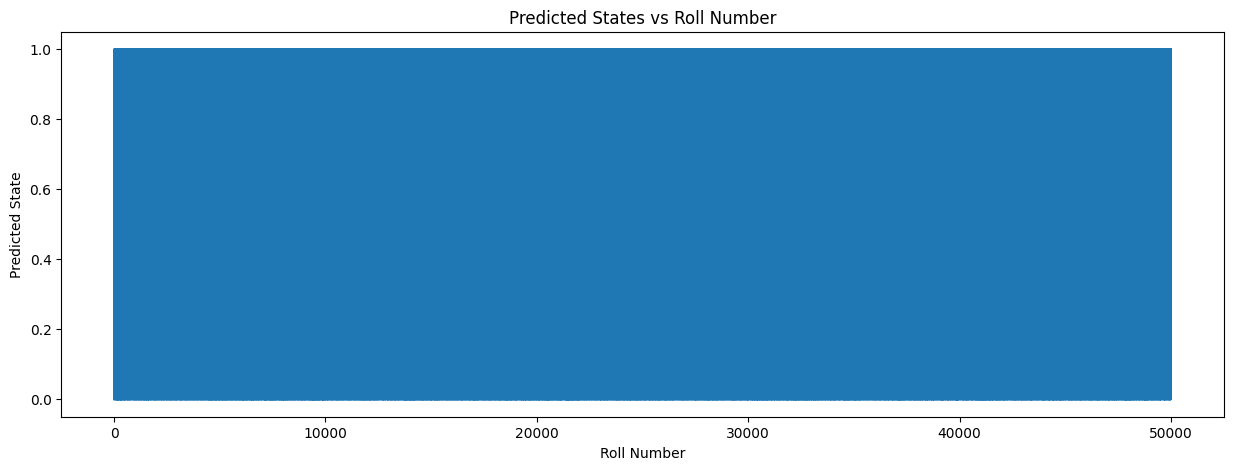

In [10]:
# Predicted states is a binary array where 0 is fair die and 1 is loaded die. Plot predicted states vs the index of the roll using a line graph.
plt.figure(figsize=(15, 5))
print(switch_indices.shape)
plt.plot(predicted_states)
plt.title("Predicted States vs Roll Number")
plt.xlabel("Roll Number")
plt.ylabel("Predicted State")
plt.show()



This task corresponds to the decoding problem in Hidden Markov Models. The decoding problem involves finding the most likely sequence of hidden states given the observed data, which is precisely what we did in Task 2.